In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats

In [9]:
def flatten(t):
    return [item for sublist in t for item in sublist]

[9543, 7442, 7349, 7446, 6810]
[7000, 6000, 5000, 6000, 5000]
Ttest_1sampResult(statistic=-1.9818121088772072, pvalue=0.04930359569448043)


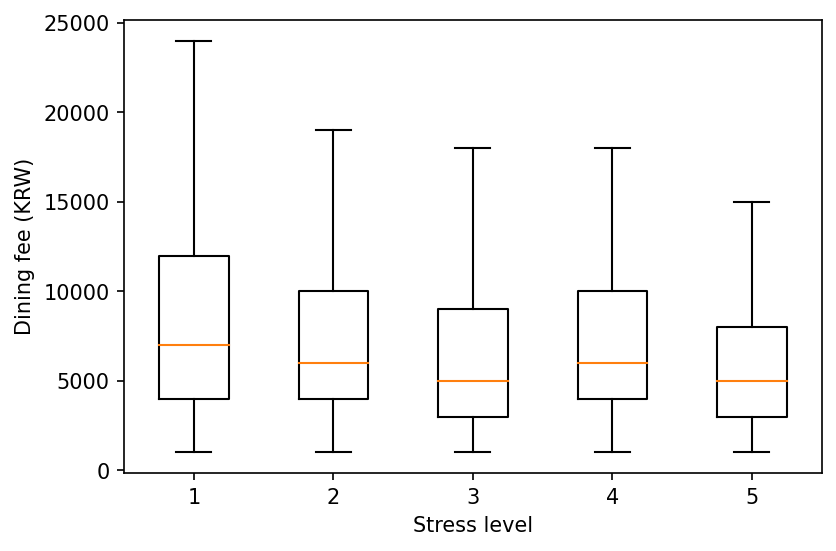

In [55]:
data = pd.read_excel('db.xlsx', sheet_name='main')
df = pd.DataFrame(data)

formatted = []
for i in range(5):
    formatted.append(df['가격'][(df['식사전스트레스지수'] == (i + 1)) & (df['가격'] != 0) ].values)

print(list(map(st.mean, formatted)))
print(list(map(st.median, formatted)))
flat = flatten(formatted)
print(stats.ttest_1samp(formatted[4], st.mean(flat)))

fig, ax = plt.subplots()
ax.set_xlabel('Stress level')
ax.set_ylabel('Dining fee (KRW)')
fig.set_dpi(150)
_ = ax.boxplot(formatted, showfliers=False, meanline=True)

<BarContainer object of 5 artists>

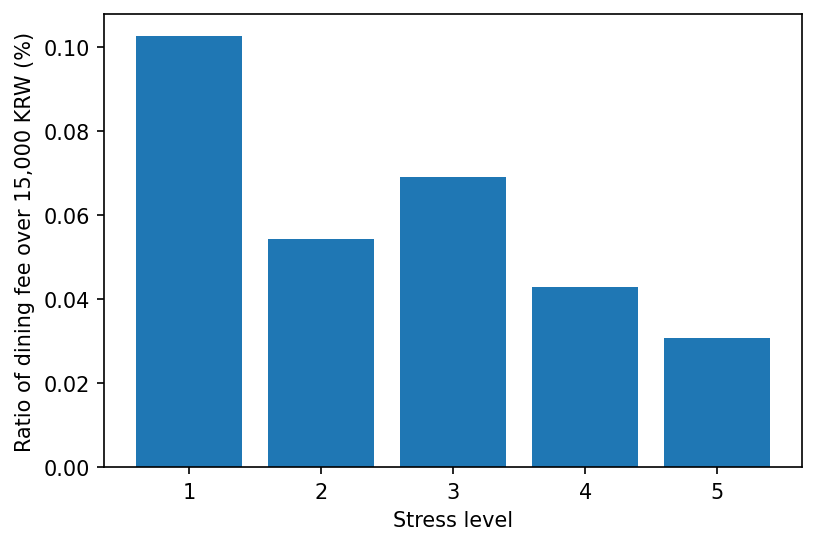

In [51]:
formatted = []
for i in range(5):
    formatted.append(len(df['가격'][(df['식사전스트레스지수'] == (i + 1)) & (df['가격'] > 15000)].values)/len(df['가격'][(df['식사전스트레스지수'] == (i + 1))].values))

fig, ax = plt.subplots()
ax.set_xlabel('Stress level')
ax.set_ylabel('Ratio of dining fee over 15,000 KRW (%)')
fig.set_dpi(150)
ax.bar([1, 2, 3, 4, 5], formatted)

<BarContainer object of 5 artists>

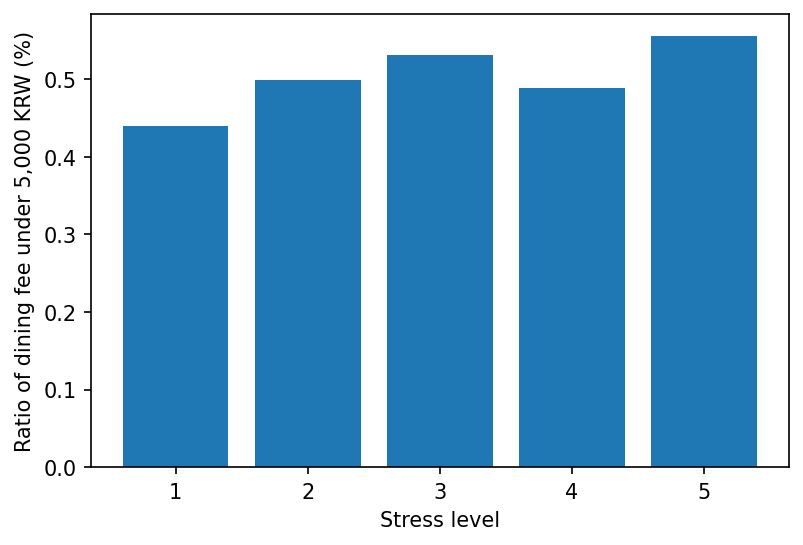

In [52]:
formatted = []
for i in range(5):
    formatted.append(len(df['가격'][(df['식사전스트레스지수'] == (i + 1)) & (df['가격'] < 5000)].values)/len(df['가격'][(df['식사전스트레스지수'] == (i + 1))].values))

fig, ax = plt.subplots()
ax.set_xlabel('Stress level')
ax.set_ylabel('Ratio of dining fee under 5,000 KRW (%)')
fig.set_dpi(150)
ax.bar([1, 2, 3, 4, 5], formatted)

[9796, 6925, 8796, 6627]
[7000, 6000.0, 6000.0, 4000]
Ttest_indResult(statistic=0.258641395333428, pvalue=0.7962641623694536)


<ipython-input-60-875616d74040>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['M - Low Stress', 'M - High Stress', 'F - Low Stress', 'F - High Stress'])


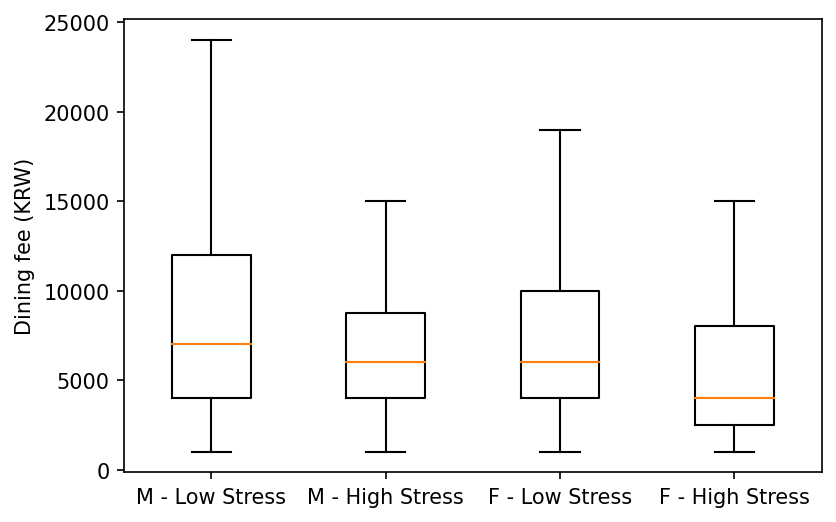

In [60]:
formatted = []
for (sex, stress) in [('남성', 1), ('남성', 5), ('여성', 1), ('여성', 5)]:
    formatted.append(df['가격'][(df['식사전스트레스지수'] == stress) & (df['가격'] != 0) & (df['성별'] == sex)].values)

print(list(map(st.mean, formatted)))
print(list(map(st.median, formatted)))
flat = flatten(formatted)
print(stats.ttest_ind(formatted[1], formatted[3]))

fig, ax = plt.subplots()
fig.set_dpi(150)
ax.set_ylabel('Dining fee (KRW)')
ax.set_xticklabels(['M - Low Stress', 'M - High Stress', 'F - Low Stress', 'F - High Stress'])
_ = ax.boxplot(formatted, showfliers=False, meanline=True)